<a href="https://colab.research.google.com/github/profandersonvanin01/ml_classificacao_vinhos/blob/main/Classifica%C3%A7%C3%A3o_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning para a Classificação de Vinhos

Base de dados: https://www.kaggle.com/datasets/dell4010/wine-dataset

O principal objetivo deste programa é criar um modelo de Machine Learning que seja capaz de classificar, de acordo com algumas propriedades, se um vinho é tinto ou branco.

In [3]:
#Importação da biblioteca Pandas
import pandas as pd

In [4]:
#Carregamento da base de dados direto do Github
arquivo = pd.read_csv('https://raw.githubusercontent.com/profandersonvanin01/ml_classificacao_vinhos/main/wine_dataset.csv')

In [6]:
#Pré-Visualização dos 5 primeiros registros da base de dados
arquivo.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
arquivo.shape()

In [7]:
arquivo

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


Repare que na última coluna (style), que é a coluna que mostra se um vinho é tinto ou branco, possui valores no formato de string.

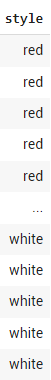

Para os modelos de Machine Learning terem um bom desempenho, é interessante transformar dados categóricos (texto) em formatos numéricos. Neste caso podemos definir que:
- vinho tinto = 0
- vinho branco = 1

In [8]:
arquivo['style'] = arquivo['style'].replace('red',0)
arquivo['style'] = arquivo['style'].replace('white',1)

In [9]:
arquivo

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


Agora precisamos criar dois datasets. Um que será somente a variável alvo (a classificação do vinho) que chamaremos aqui de y, e um outro que terá as variáveis preditoras (todo o restante do dataset menos a variável alvo) que chamaremos de X.

In [10]:
y = arquivo['style']
X = arquivo.drop('style', axis = 1)

In [11]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: style, Length: 6497, dtype: int64

In [12]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Agora que temos as variaveis preditoras e a alvo separadas, temos que separar os dados de ambas em dados para treinamento e dados para testes.
Para isso vamos importar uma biblioteca.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
#Criando os conjuntos de dados de treino e teste:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

Uma vez que já temos os dados separados. Podemos utilizar algum modelo de Machine Learning para Classificação. Vamos utilizar um modelo chamado ExtraTreesClassifier.

In [15]:
from sklearn.ensemble import ExtraTreesClassifier

In [18]:
#Criação do modelo:
modelo = ExtraTreesClassifier(n_estimators = 10000,max_depth=3,verbose=1)

In [19]:
#treino do modelo
modelo.fit(X_treino,y_treino)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:   12.2s finished


ExtraTreesClassifier(max_depth=3, n_estimators=10000, verbose=1)

In [20]:
#mostrando resultados do treino
resultado = modelo.score(X_teste,y_teste)
print('Acurácia: ', resultado)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Acurácia:  0.8743589743589744


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    4.6s finished


Uma vez que o modelo está treinado e sua acurácia atingiu um valor aceitável, vamos fazer alguns testes com valores que o modelo nunca viu.
Para facilitar, vamos escolher 3 registros.

In [21]:
y_teste[400:403]

5739    1
3522    1
1582    0
Name: style, dtype: int64

In [23]:
X_teste[400:403]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
5739,6.8,0.280,0.29,11.9,0.052,51.0,149.0,0.99544,3.02,0.58,10.4,6
3522,8.2,0.370,0.27,1.7,0.028,10.0,59.0,0.99230,2.97,0.48,10.4,5
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5


In [24]:
#Executando previsões
previsoes = modelo.predict(X_teste[400:403])
previsoes

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    3.1s finished


array([1, 1, 0])

Uma matriz de confusão é uma tabela que indica os erros e acertos do seu modelo, comparando com o resultado esperado (ou etiquetas/labels). A imagem abaixo demonstra um exemplo de uma matriz de confusão.


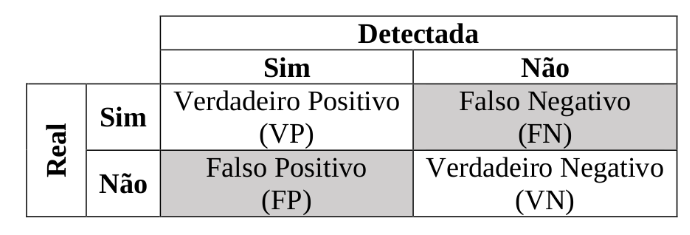

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Matriz de Confusão, sem normalização
[[ 247  245]
 [   0 1458]]
Matriz de Confusão Normalizada
[[0.50203252 0.49796748]
 [0.         1.        ]]


[Parallel(n_jobs=1)]: Done 10000 out of 10000 | elapsed:    2.2s finished


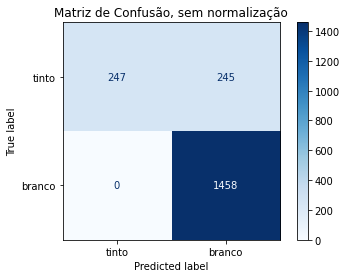

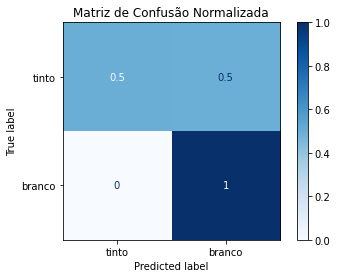

In [36]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Matriz de Confusão, sem normalização", None),
    ("Matriz de Confusão Normalizada", "true"),
]

class_names = ['tinto','branco']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        modelo,
        X_teste,
        y_teste,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Utilizando outros modelos preditores

## RandonForest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
#Criação do modelo:
modelo_rf = RandomForestClassifier(max_depth=2, random_state=0, verbose=1) 

In [27]:
#treino do modelo
modelo_rf.fit(X_treino,y_treino)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomForestClassifier(max_depth=2, random_state=0, verbose=1)

In [28]:
#mostrando resultados do treino
resultado_rf = modelo_rf.score(X_teste,y_teste)
print('Acurácia: ', resultado_rf)

Acurácia:  0.9702564102564103


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [29]:
#Executando previsões
previsoes_rf = modelo_rf.predict(X_teste[400:403])
previsoes_rf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1, 1, 0])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Matriz de Confusão, sem normalização
[[ 437   55]
 [   3 1455]]
Matriz de Confusão Normalizada
[[0.88821138 0.11178862]
 [0.00205761 0.99794239]]


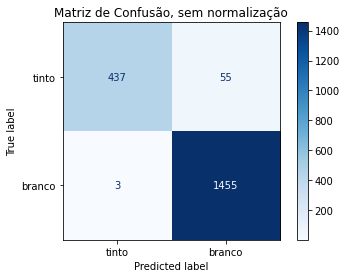

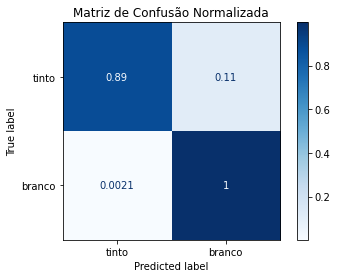

In [37]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Matriz de Confusão, sem normalização", None),
    ("Matriz de Confusão Normalizada", "true"),
]

class_names = ['tinto','branco']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        modelo_rf,
        X_teste,
        y_teste,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Arvore de Decisão

In [30]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
arvore.fit(X_treino,y_treino)
resultado_arvore = arvore.score(X_teste,y_teste)
print('Acurácia: ', resultado_arvore)

Acurácia:  0.9676923076923077


In [31]:
#Executando previsões
previsoes_arvore = arvore.predict(X_teste[400:403])
previsoes_arvore

array([1, 1, 0])

Matriz de Confusão, sem normalização
[[ 464   28]
 [  35 1423]]
Matriz de Confusão Normalizada
[[0.94308943 0.05691057]
 [0.02400549 0.97599451]]


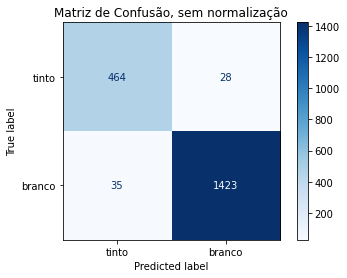

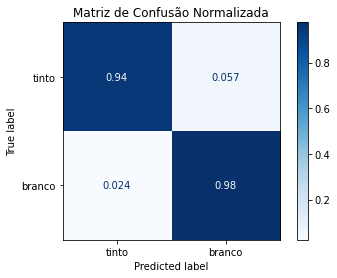

In [38]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Matriz de Confusão, sem normalização", None),
    ("Matriz de Confusão Normalizada", "true"),
]

class_names = ['tinto','branco']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        arvore,
        X_teste,
        y_teste,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Visualização da Árvore de Decisão

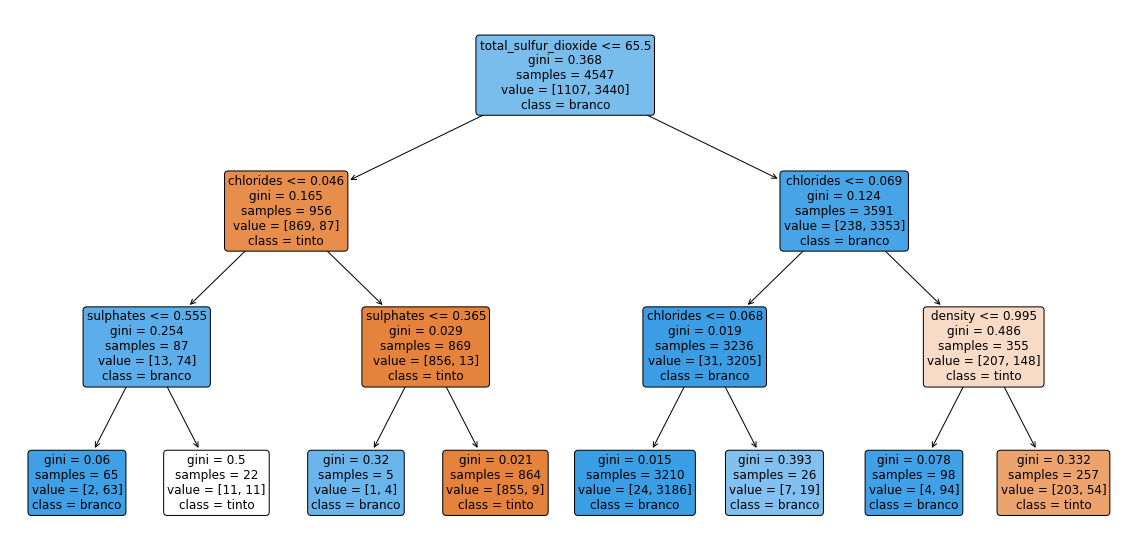

In [59]:
from sklearn import tree
#tree.plot_tree(arvore)
#plt.show()

plt.figure(figsize=(20,10))  # customize according to the size of your tree
_ = tree.plot_tree(arvore, feature_names = X.columns, class_names=['tinto','branco'], filled=True, fontsize=12, rounded = True)
plt.show()


## Curva de Recall e Precisão

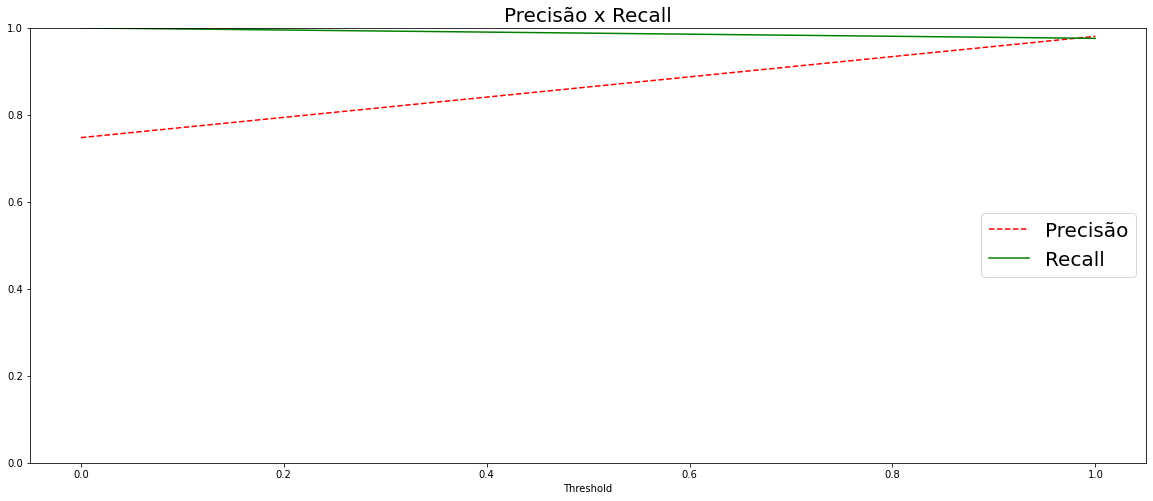

In [61]:
previsoes_arvore2 = arvore.predict(X_teste)
previsoes_arvore2

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_teste, previsoes_arvore2)

fig, ax = plt.subplots(figsize = (20,8))
plt.plot(thresholds, precisions[:-1], 'r--', label = 'Precisão')
plt.plot(thresholds, recalls[:-1], 'g-', label = 'Recall')
plt.xlabel('Threshold')
plt.legend(loc = 'center right',fontsize = 20)
plt.ylim([0,1])
plt.title('Precisão x Recall', fontsize = 20)
plt.show()

## Relatório de Métricas

- **Acurácia**: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
- **Precisão**: dentre todas as classificações de classe Positivo que o modelo fez, quantas estão corretas;
- **Recall/Revocação/Sensibilidade**: dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas;
- **F1-Score**: média harmônica entre precisão e recall.

In [54]:
from sklearn.metrics import classification_report
# relatório do modelo
print('Relatório de classificação:\n', classification_report(y_teste, previsoes_arvore2, digits=4))

Relatório de classificação:
               precision    recall  f1-score   support

           0     0.9299    0.9431    0.9364       492
           1     0.9807    0.9760    0.9783      1458

    accuracy                         0.9677      1950
   macro avg     0.9553    0.9595    0.9574      1950
weighted avg     0.9679    0.9677    0.9678      1950

